# CNN Variation 2

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os, shutil
from glob import glob

In [2]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/train'
val_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/val'
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'

In [5]:
batch_size = 32
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='binary')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')

Found 3650 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


## CNN

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

#model.add(Conv2D(32, (3,3),activation='relu'))
#model.add(MaxPool2D((2,2)))

#model.add(Conv2D(128, (3,3),activation='relu'))
#model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-12-02 09:50:16.292236: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [9]:
result = model.fit(
    train_generator,
    #steps_per_epoch=8,
    epochs=30,
    validation_data=val_generator,
    #validation_steps=10
)

2021-12-02 09:50:40.967875: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
115/115 [==============================] - 111s 954ms/step - loss: 1.0007 - accuracy: 0.7167 - val_loss: 0.5192 - val_accuracy: 0.7428
Epoch 2/30
115/115 [==============================] - 91s 792ms/step - loss: 0.5671 - accuracy: 0.8003 - val_loss: 0.3697 - val_accuracy: 0.8637
Epoch 3/30
115/115 [==============================] - 88s 766ms/step - loss: 0.3551 - accuracy: 0.8512 - val_loss: 0.2815 - val_accuracy: 0.8906
Epoch 4/30
115/115 [==============================] - 88s 768ms/step - loss: 0.2513 - accuracy: 0.9011 - val_loss: 0.2965 - val_accuracy: 0.8829
Epoch 5/30
115/115 [==============================] - 203s 2s/step - loss: 0.1874 - accuracy: 0.9293 - val_loss: 0.1331 - val_accuracy: 0.9443
Epoch 6/30
115/115 [==============================] - 301s 3s/step - loss: 0.1579 - accuracy: 0.9342 - val_loss: 0.2425 - val_accuracy: 0.8964
Epoch 7/30
115/115 [==============================] - 338s 3s/step - loss: 0.1250 - accuracy: 0.9521 - val_loss: 0.0928 - val_accurac

In [10]:
model.save('model_CNN_Reg_2_data.h5')

In [11]:
result.history['accuracy']

[0.7167123556137085,
 0.8002739548683167,
 0.8512328863143921,
 0.9010958671569824,
 0.9293150901794434,
 0.9342465996742249,
 0.9520547986030579,
 0.9594520330429077,
 0.9663013815879822,
 0.9698629975318909,
 0.9745205640792847,
 0.9739726185798645,
 0.9808219075202942,
 0.9810959100723267,
 0.985479474067688,
 0.9791780710220337,
 0.9824657440185547,
 0.9923287630081177,
 0.9931507110595703,
 0.9947945475578308,
 0.9983561635017395,
 0.9997260570526123,
 0.9997260570526123,
 0.9980822205543518,
 0.9972602725028992,
 0.9994520545005798,
 0.9997260570526123,
 1.0,
 1.0,
 1.0]

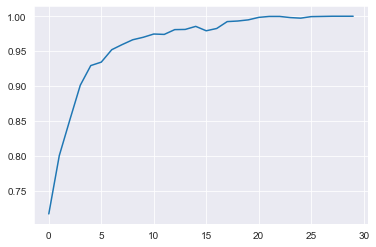

In [12]:
plt.plot(result.history['accuracy'])

In [13]:
model.metrics_names

['loss', 'accuracy']

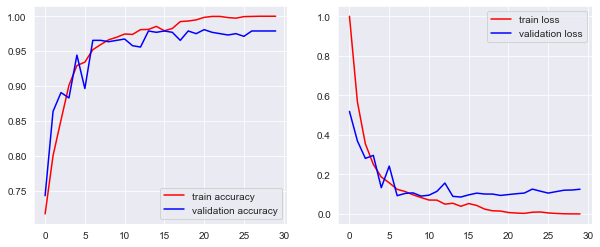

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
prediction = model.predict(test_generator)

In [19]:
import math
num_of_examples = len(test_generator.filenames)
num_of_generator_calls = math.ceil(num_of_examples/(1.0*80))
test_labels=[]
for i in range(0,int(num_of_generator_calls)):
    test_labels.extend(np.array(test_generator[i][1]))

In [20]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [23]:
confusion_matrix(test_labels, np.round(prediction))

ValueError: Found input variables with inconsistent numbers of samples: [448, 1045]

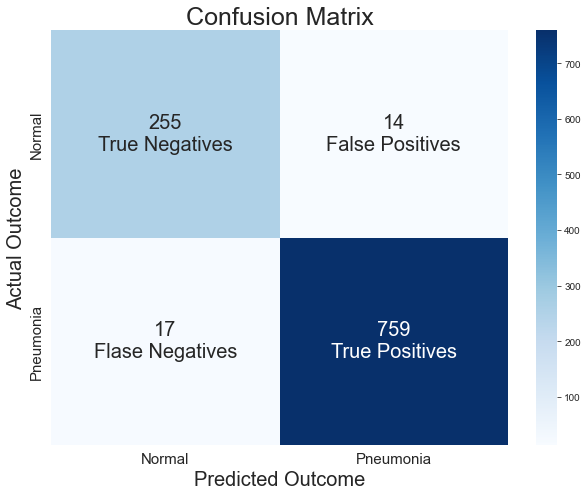

In [22]:
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [1]:
print(classification_report(test_labels, np.round(prediction)))

NameError: name 'classification_report' is not defined